In [2]:
%matplotlib inline

import skimage.color
import skimage.io
import skimage.filters
import skimage.feature
import skimage.exposure

import spectral
import spectral.io.envi as envi

import numpy
import matplotlib.pyplot as plt
import math
import sys, os

## Opening image

In [36]:
img = spectral.open_image('Oslo_hyper.hdr')
img

	Data Source:   '././Oslo_hyper'
	# Rows:            924
	# Samples:        1080
	# Bands:           186
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

## RGB and NIR bands

In [37]:
# Return the index of band that is closest to specified @wavelenght
def find_band(img, wavelength):
    diffs = [ (i, abs(v - wavelength)) for i, v in enumerate(img.bands.centers) ]
    closest = sorted(diffs, key=lambda t: t[1])[0]
    return closest[0]
    
bands = {
    'blue': find_band(img, 440),
    'green': find_band(img, 535),
    'red': find_band(img, 645),
    'nir': find_band(img, 800),
}
bands

{'blue': 10, 'green': 40, 'nir': 123, 'red': 75}

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0015359327662736177, 0.39292255043983459]
    G: [0.0015359327662736177, 0.39292255043983459]
    B: [0.0015359327662736177, 0.39292255043983459]

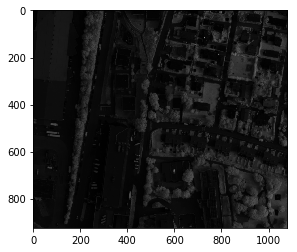

In [48]:
# TODO: Display a RGB image
band = img[:,:,bands['nir']]
spectral.imshow(band)

## Normalized Difference Vegetation Index

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.78120332956314087, 0.92286616563796997]
    G: [-0.78120332956314087, 0.92286616563796997]
    B: [-0.78120332956314087, 0.92286616563796997]

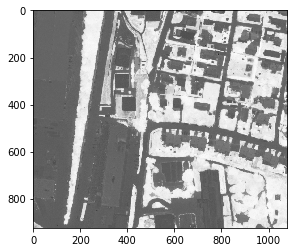

In [50]:
def calculate_ndvi(nir, red):
    return (nir-red)/(nir+red)
ndvi = calculate_ndvi(img[:,:,bands['nir']], img[:,:,bands['red']])
spectral.imshow(ndvi)

In [51]:
# TODO: Make bigger. Check that the NDVI image in a sensible range

## Mean spectrum
Compute the mean spectrum of all the pixels in the hypercube, show the spectrum in the report together with a spectrum from a region with plants, and a spectrum from a region with asphalt.

## NDVI histogram
Compute and display a histogram of all the NDVI values in the image,

## NDVI thresholded
Make a threshold of NDVI > 0.6 and set all values with NDVI > 0.6 to zero. Display this image. What do you see ?

Can you use this information to determine the  fraction area of the image that has vegetation ?

## Principle Component Analysis
Carry out a principal component analysis (PCA) of the image, using the pca function from the Spectral Python. Can any of the first 3 components be used to identify vegetation in the image ? Include the first 3 score images in your report.

## K-means clustering
Carry out a k-means clustering, try with 2, 3, 4 and 5 classes. Plot the spectra for each group. How many components would you chose in order to group all the pixels with vegetation ?  Include one of the k-mean calculations in the report

Which method to determine the amount of vegetation do you think is most appropriate in this hyperspectral image ? Describe why you prefer one method before another.